# Scenario

In deze notebook ga ik stap voor stap door de data die we gebruiken voor de video over de extreme infospheren op YouTube.

Doelen van de video: 

1. Kijkers laten zien hoe groot en extreem deze infospheren zijn. 
2. Kijkers bekend maken met de belangrijkste ideeen en richtingen in deze infospheren.

Dit doen we door telkens te wisselen tussen macroniveau (hoe ziet die sphere eruit als je erboven hangt, dus hoe verhouden kanalen zich tot elkaar, tot andere spheres en tot andere media) en microniveau (wat gebeurt er nu eigenlijk in en onder die video's, hoe gedragen reaguurders zich?)

Daarvoor hebben we deze graphics nodig die de rode draad vormen van het scenario.

1. Belang YT in mediaconsumptie
2. Relatieve omvang van de spheres op YT (socialblade).
3. Aard en omvang van kanalen, verteld aan de hand van enkele representatieve kanalen.
4. Groei van de spheres - gapminder (10 geselecteerden) / onderwerp
5. Onderwerpen die behandeld worden (4 of 5, waaronder antifeminisme, biologisch racisme, vluchtelingen en migratie, antisemitisme, islamofobie.
6. Inzoomen op enkele reaguurders-communities (op groepsniveau en enkele individuen)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt
import glob 
import csv 
import re
import sys
import os

csv.field_size_limit(sys.maxsize)
%matplotlib inline

In [2]:
path_nl = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/NL/'
path_right = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/right/'
path_left = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/left/'

## Belang YT in mediaconsumptie

Bronnen: 

1. [Mediamonitor 2018](https://www.cvdm.nl/wp-content/uploads/2018/06/Mediamonitor-2018-Reuters-Institute-Digital-News-Report-Nederland-2018.pdf)
2. [Marketingfacts](https://www.marketingfacts.nl/berichten/jongeren-keren-facebook-massaal-de-rug-toe)
3. [Pew research center](http://www.pewinternet.org/2018/05/31/teens-social-media-technology-2018/)



In [3]:
# Marketingfacts, percentage dat ... gebruikt.

data = {'WhatsApp':[97, 93, 86, 67, 38],
        'Facebook':[72, 89, 77, 69, 58],
        'YouTube':[86, 74, 54, 38, 21],
        'LinkedIn':[12, 45, 36, 14, 7],
        'Instagram':[73, 46, 22, 9, 6],
        'Twitter':[23, 26, 21, 9, 9],
        'Pinterest':[19, 30, 21, 12, 8],
        'Snapchat':[72, 32, 7, 1, 1]       
       }

marketingfacts = pd.DataFrame.from_dict(data, orient='index',
                             columns=['15-19 jaar', '20-39 jaar', '40-64 jaar', '65-79 jaar', '80+'])

In [4]:
marketingfacts

,15-19 jaar,20-39 jaar,40-64 jaar,65-79 jaar,80+
WhatsApp,97,93,86,67,38
Facebook,72,89,77,69,58
YouTube,86,74,54,38,21
LinkedIn,12,45,36,14,7
Instagram,73,46,22,9,6
Twitter,23,26,21,9,9
Pinterest,19,30,21,12,8
Snapchat,72,32,7,1,1


In [5]:
# Pew, perentage tieners die 

data = {'Youtube': [85, 32],
        'Instagram': [72, 15],
        'Snapchat': [69, 35],
        'Facebook': [51, 10],
        'Twitter': [32, 3],
        'Tumblr': [9, 1],
        'Reddit': [7, 1],
        'Geen van bovenstaande': [3, 3]
       }

pew = pd.DataFrame.from_dict(data, orient='index',
                            columns=['Zegt te gebruiken', 'Zegt het meest te gebruiken'])

In [6]:
pew

,Zegt te gebruiken,Zegt het meest te gebruiken
Youtube,85,32
Instagram,72,15
Snapchat,69,35
Facebook,51,10
Twitter,32,3
Tumblr,9,1
Reddit,7,1
Geen van bovenstaande,3,3


## Relatieve omgang van de spheres

Socialblade gebruikt een eigen ranking die gebaseerd is op viewcount, subscribercount en nog een paar zaken die ze niet openbaar heeft gemaakt. Dit geeft een idee waar we bepaalde kanalen moeten plaatsen binnen YouTube, hoe groot en invloedrijk ze zijn. 

Enkele voorbeelden:

Volkskrant ranks:
- Grade: C+
- Subscriber rank: 1,001,161st
- Video view rank: 502,428th
- Socialblade rank: 523,376th
- Estimated Monthly Earnings: €29 - €459
- Estimated Yearly Earnings: €344 - €5.5K

De Correspondent ranks:
- Grade: C
- Subscriber rank: 1,832,426th
- Video view rank: 5,212,726th
- Socialblade rank: 4,469,657th
- Estimated Monthly Earnings: €0.47 - €8
- Estimated Yearly Earnings: €6 - €90

The New York Times ranks:
- Grade: B+
- Subcriber rank: 5,443rd
- Video view rank: 3,210th
- Socialblade rank: 8,201st
- Estimated Monthly Earnings: €5.2K - €82.4K
- Estimated Yearly Earnings: €61.8K - €989.2K


In [7]:
# Er komt flink wat herhaling aan te pas, dus laten we een functie maken die de socialblade data opschoont.

def rank_channels(channel_ranking):
    '''de functie neemt een dataframe en 
    schoont de kolommen op'''
    channel_ranking['Source Url'] = channel_ranking['Source Url'].str.replace('https://socialblade.com/youtube/channel/', '')
    channel_ranking['Subscriber_Rank'] = channel_ranking['Subscriber_Rank'].replace('\D', '', regex=True).apply(pd.to_numeric)
    channel_ranking['Video_View_Rank'] = channel_ranking['Video_View_Rank'].replace('\D', '', regex=True).apply(pd.to_numeric)
    channel_ranking['Sb_Rank'] = channel_ranking['Sb_Rank'].replace('\D', '', regex=True).apply(pd.to_numeric)
    channel_ranking['earnings_low'], channel_ranking['earnings_high'] = channel_ranking['Estimated_Yearly_Earning'].str.split('-', 1).str
    channel_ranking['earnings_low'] = channel_ranking['earnings_low'].replace('st|th|rd|nd', '', regex=True)
    channel_ranking['earnings_high'] = channel_ranking['earnings_high'].replace('st|th|rd|nd', '', regex=True)
    channel_ranking = channel_ranking.rename(columns={'Source Url': 'channel_id',
                                                    'Subscriber_Rank': 'subscriber_rank',
                                                    'Video_View_Rank': 'video_view_rank',
                                                    'Sb_Rank': 'sb_rank',
                                                    'Grade': 'grade'
                                               })
    return channel_ranking

In [8]:
channel_ranking = pd.read_csv(path_nl + 'other_platforms/socialblade_nl_right_summary.csv')
channel_ranking_nl = rank_channels(channel_ranking)
channel_ranking_nl['sphere'] = 'nl_right'
channels_nl = pd.read_csv(path_nl + 'channels_nl_right.csv')
ranking_nl = pd.merge(channel_ranking_nl, channels_nl, on='channel_id', how='left')

In [9]:
channel_ranking = pd.read_csv(path_right + 'other_platforms/socialblade_right_summary.csv')
channel_ranking_right = rank_channels(channel_ranking)
channel_ranking_right['sphere'] = 'int_right'
channels_right = pd.read_csv(path_right + 'channels_right.csv')
ranking_right = pd.merge(channel_ranking_right, channels_right, on='channel_id', how='left')

In [10]:
channel_ranking = pd.read_csv(path_left + 'other_platforms/socialblade_left_summary.csv')
channel_ranking_left = rank_channels(channel_ranking)
channel_ranking_left['sphere'] = 'int_left'
channels_left = pd.read_csv(path_left + 'channels_left.csv')
ranking_left = pd.merge(channel_ranking_left, channels_left, on='channel_id', how='left')

In [11]:
rankings_total = ranking_nl.append([ranking_left, ranking_right])

In [12]:
rankings_total.sort_values('sb_rank')

,channel_id,Uploads,Subscribers,Videoviews,Country,grade,subscriber_rank,video_view_rank,sb_rank,Estimated_Yearly_Earning,...,channel_default_language,channel_country,channel_uploads,channel_viewcount,channel_commentcount,channel_subscribercount,channel_videocount,channel_topic_ids,channel_topic_categories,channel_branding_keywords
0,UC1yBKRuGpC1tSM73A0ZjYjQ,"34,807","4,227,080","4,501,798,901",US,B+,1266.0,227.0,2108.0,115.5K - €1.8M,...,not set,US,UU1yBKRuGpC1tSM73A0ZjYjQ,4.483197e+09,0.0,4229161.0,34672.0,"['/m/05qt0', '/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Society', 'htt...","news politics tyt ""young turks"" ""the young tur..."
79,UCIveFvW-ARp_B_RckhweNJw,800,"3,091,587","626,998,405",US,B+,2088.0,3433.0,2489.0,84.6K - €1.4M,...,not set,not set,UUIveFvW-ARp_B_RckhweNJw,6.285336e+08,0.0,3101925.0,800.0,"['/m/02jjt', '/m/098wr']","['https://en.wikipedia.org/wiki/Society', 'htt...",Steven Crowder Louder With Politics Conservati...
115,UCZWlSUNDvCCS1hBiXV0zKcA,493,"1,854,550","552,298,563",US,B+,4402.0,3998.0,3298.0,86.9K - €1.4M,...,not set,US,UUZWlSUNDvCCS1hBiXV0zKcA,5.543337e+08,0.0,1857495.0,494.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],"""prager university"" prager ""dennis prager"" pra..."
1,UCsqjHFMB_JYTaEnf_vmTNqg,342,"2,296,555","549,340,953",US,B+,3267.0,4018.0,4012.0,68.1K - €1.1M,...,not set,not set,UUsqjHFMB_JYTaEnf_vmTNqg,5.375717e+08,0.0,2255404.0,338.0,"['/m/07yv9', '/m/019_rr']","['https://en.wikipedia.org/wiki/Vehicle', 'htt...",not set
37,UCaeO5vkdj5xOQHp4UmIN6dw,"2,896","1,114,265","219,562,403",US,B+,8679.0,11607.0,5293.0,51.1K - €817.4K,...,not set,US,UUaeO5vkdj5xOQHp4UmIN6dw,2.204370e+08,0.0,1117311.0,2918.0,"['/m/05qt0', '/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Politics', 'ht...","""The Daily Wire"" ""Daily Wire"" ""Ben Shapiro"" ""A..."
613,UCgV-hgprraRb071mumQFw2g,13,"162,439","23,889,194",US,B+,66305.0,113601.0,8263.0,18.2K - €291.8K,...,not set,US,UUgV-hgprraRb071mumQFw2g,2.404829e+07,0.0,163126.0,13.0,"['/m/0glt670', '/m/0glt670', '/m/04rlf']","['https://en.wikipedia.org/wiki/Music', 'https...",not set
127,UCe02lGcO-ahAURWuxAJnjdA,440,"122,819","27,450,921",NaN,B,85993.0,100993.0,16358.0,21.7K - €347.8K,...,not set,not set,UUe02lGcO-ahAURWuxAJnjdA,2.794160e+07,0.0,123873.0,446.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],politics
26,UC0rZoXAD5lxgBHMsjrGwWWQ,"3,953","320,417","124,034,333",US,B,34383.0,21544.0,16789.0,24.2K - €387.9K,...,not set,US,UU0rZoXAD5lxgBHMsjrGwWWQ,1.245075e+08,0.0,321387.0,3957.0,"['/m/098wr', '/m/019_rr', '/m/05qt0']","['https://en.wikipedia.org/wiki/Politics', 'ht...","""current events"" ""tarl warwick"" politics occul..."
146,UCy-N04M3rGQMznjIv5g2LGQ,315,0,"26,023,268",GB,B,24218778.0,107455.0,17451.0,18.2K - €290.6K,...,not set,GB,UUy-N04M3rGQMznjIv5g2LGQ,2.649125e+07,0.0,0.0,316.0,"['/m/05qt0', '/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Society', 'htt...",not set
5,UCvixJtaXuNdMPUGdOPcY8Ag,"18,150","543,830","373,338,213",US,B,19669.0,6382.0,17563.0,20.9K - €334.9K,...,not set,US,UUvixJtaXuNdMPUGdOPcY8Ag,3.696483e+08,0.0,536287.0,18083.0,"['/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Society', 'htt...","""the david pakman show"" politics news republic..."


Misschien is het interessant om een verdeling te maken van hoe hoog de verschillende sferen (links/rechts) scoren. Ook moeten we nog even kritisch kijken of we alle kanalen er wel in willen hebben. Bij sommige hebben we twijfels. Die kunnen we er even uitfilteren. 


In [13]:
# Vul hier de kanalen in die je niet wilt

ongewenste_kanalen = []

rankings_total = rankings_total[~rankings_total['channel_title'].isin(ongewenste_kanalen)]

## Groei van de spheres

Hiervoor gebruiken we in eerste instantie cijfers van socialblade.com. Probleem is dat die maar teruggaan tot 2015. Dus ik wil ook nog de video's gebruiken. Probleem is alleen dat die cijfers minder kloppen omdat oude videos relatief hoge viewcounts hebben, omdat die lang nadien nog bekeken kunnen worden. Een video uit 2011 kan nu nog steeds viewcounts krijgen. Socialblade bakent dit af per maand, dus is nauwkeuriger. Maar laten we het gewoon allebei proberen. 

In [14]:
channel_history_nl = pd.read_csv(path_nl + 'other_platforms/socialblade_nl_monthly.csv')
channel_history_right = pd.read_csv(path_right + 'other_platforms/socialblade_right_monthly.csv')
channel_history_left = pd.read_csv(path_left + 'other_platforms/socialblade_left_monthly.csv')
channel_history_nl['sphere'] = 'nl_right'
channel_history_right['sphere'] = 'int_right'
channel_history_left['sphere'] = 'int_left'
channel_history = channel_history_nl.append([channel_history_left, channel_history_right])
channel_history = channel_history.rename(columns={'User':'channel_id'})
len(channel_history)

1402

In [15]:
channel_history.head()

,Source Url,channel_id,Date_Daily_Subs,Date_Total_Subs,Date_Daily_Views,Date_Total_Views,Date_Average_Views,Date_Monthly_Views,sphere
0,https://socialblade.com/youtube/channel/UCmboH...,UCmboH8kxYUEQ9p4t7IrgL-Q,"2017-03-16,10\n"" + ""2017-03-17,1\n"" + ""2017-03...","+ ""2017-03-16,360\n"" + ""2017-03-17,370\n"" + ""2...","2017-03-16,136\n"" + ""2017-03-17,443\n"" + ""2017...","2017-03-16,14094\n"" + ""2017-03-17,14230\n"" + ""...","2017-03-1,70\n"" + ""2017-04-1,75\n"" + ""2017-05-...","2017-03-1,2196\n"" + ""2017-04-1,2250\n"" + ""2017...",nl_right
1,https://socialblade.com/youtube/channel/UCaEYL...,UCaEYLMXh96lyMfVwGhVzDZA,"2015-06-30,0\n"" + ""2015-07-01,0\n"" + ""2015-07-...","+ ""2015-06-30,316\n"" + ""2015-07-01,316\n"" + ""2...","2015-06-30,0\n"" + ""2015-07-01,1810400\n"" + ""20...","2015-06-30,1810400\n"" + ""2015-07-01,0\n"" + ""20...","2015-06-1,0\n"" + ""2015-07-1,-58180\n"" + ""2015-...","2015-06-1,0\n"" + ""2015-07-1,-1803574\n"" + ""201...",nl_right
2,https://socialblade.com/youtube/channel/UCVVpl...,UCVVplPd75SucSkTvuW4bW-w,"2017-06-16,9\n"" + ""2017-06-17,1\n"" + ""2017-06-...","+ ""2017-06-16,34\n"" + ""2017-06-17,43\n"" + ""201...","2017-06-16,0\n"" + ""2017-06-17,7507\n"" + ""2017-...","2017-06-16,7945\n"" + ""2017-06-17,7945\n"" + ""20...","2017-06-1,537\n"" + ""2017-07-1,28\n"" + ""2017-08...","2017-06-1,16128\n"" + ""2017-07-1,874\n"" + ""2017...",nl_right
3,https://socialblade.com/youtube/channel/UC9H9K...,UC9H9K7oSpte0uWBofdW4UiA,"2016-09-25,34\n"" + ""2016-09-26,26\n"" + ""2016-0...","+ ""2016-09-25,1769\n"" + ""2016-09-26,1803\n"" + ...","2016-09-25,0\n"" + ""2016-09-26,34237\n"" + ""2016...","2016-09-25,188341\n"" + ""2016-09-26,188341\n"" +...","2016-09-1,2779\n"" + ""2016-10-1,2038\n"" + ""2016...","2016-09-1,83392\n"" + ""2016-10-1,63188\n"" + ""20...",nl_right
4,https://socialblade.com/youtube/channel/UCCEuh...,UCCEuhjaT09ArS77AJm6etXw,"2015-06-17,-2\n"" + ""2015-06-18,3\n"" + ""2015-06...","+ ""2015-06-17,2651\n"" + ""2015-06-18,2649\n"" + ...","2015-06-17,934\n"" + ""2015-06-18,845\n"" + ""2015...","2015-06-17,1478741\n"" + ""2015-06-18,1479675\n""...","2015-06-1,10671\n"" + ""2015-07-1,2077\n"" + ""201...","2015-06-1,320159\n"" + ""2015-07-1,64401\n"" + ""2...",nl_right


In [16]:
# Extract all the dates and values of two columns: daily views and total subs

pattern = re.compile('(\d{4}-\d{2}-\d+,\d+)')

# And create two new columns with lists of dates and values found

channel_history['daily_views'] = channel_history['Date_Daily_Views'].str.findall(pattern)
channel_history['daily_subs'] = channel_history['Date_Total_Subs'].str.findall(pattern)

# Stack them, so all the dates and values are linked to the channels and
# we are getting rid of the messy lists.

daily_views = channel_history.set_index('channel_id') \
            .daily_views.apply(pd.Series) \
            .stack() \
            .reset_index(level=-1, drop=True) \
            .reset_index()

# Extract the values columns for views and subscriptions (subs)

daily_views['date'], daily_views['views'] = daily_views[0].str.split(',', 1).str
daily_views = daily_views[['channel_id', 'date', 'views']]

daily_subs = channel_history.set_index('channel_id') \
            .daily_subs.apply(pd.Series) \
            .stack() \
            .reset_index(level=-1, drop=True) \
            .reset_index()

daily_subs['date'], daily_subs['subs'] = daily_subs[0].str.split(',', 1).str
daily_subs = daily_subs[['channel_id', 'date', 'subs']]

# And bring it all together in a dataframe called daily_stats

daily_stats = pd.merge(daily_subs, daily_views,  how='left', left_on=['channel_id', 'date'], right_on = ['channel_id', 'date'])


In [17]:
stats = pd.merge(daily_stats, channel_history[['channel_id', 'sphere']])

In [18]:
channels_nl = pd.read_csv(path_nl + 'channels_nl_right.csv')
channels_left = pd.read_csv(path_left + 'channels_left.csv')
channels_right = pd.read_csv(path_right + 'channels_right.csv')
channels_nl['sphere'] = 'nl_right'
channels_left['sphere'] = 'int_left'
channels_right['sphere'] = 'int_right'
channels_total = channels_nl.append([channels_left, channels_right])

In [19]:
len(channels_total)

1805

In [20]:
stats_final = pd.merge(stats, channels_total[['channel_id', 'channel_title']], on='channel_id', how='left')

In [21]:
stats_channels = stats_final.dropna()

In [22]:
stats_channels['yearmonth'] = pd.to_datetime(stats_channels['date']).dt.to_period('M')

/home/dim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
len(stats_channels)

1290029

In [24]:
monthly_stats = stats_channels[['channel_title', 'yearmonth', 'subs', 'views', 'sphere']]
monthly_stats.to_csv('output/montly_statistics_for_scenario.csv', index=False)

Laten we een subset nemen, want dit is wel erg veel.

Voorstel:

- 'Stefan Molyneux', (bekend en al sinds 2008 actief)
- 'Red Ice TV', (populair en Europees)
- 'Millennial Woes', (invloedrijk, doch een behoorlijke randfiguur)
- 'Andywarski', (zou een gematigd figuur moeten zijn, maar biedt ruimte aan extremen. vernieuwend format)
- 'Alt-Right Tankie- Eurasianist', (hardcore alt-right)
- 'The Alternative Hypothesis', (idem, met interessant game-format)
- 'Rebel Media', (zeer hard gegroeid, behoorlijk professioneel)
- 'Styxhexenhammer666', (vertegenwoordigt het occulte deel)
- 'Jean-Francois Gariépy', (Franse biologische racist die ook veel met andere youtubers samenwerkt)
- 'Gavin McInnes', (antifeminist, veel in het nieuws)
- 'Politiekman', (een van de weinige NL alt-right youtubers. recentelijk gestopt)
- 'Black Pigeon Speaks', (bekend kanaal, mag eventueel afvallen)
- 'Paul Joseph Watson', (vertegenwoordigt het conspiracy-deel. zeer populair)
- 'The Thinkery', (filosofische tak)
- 'Sargon of Akkad', (groot en directe relatie met de gamergate controverse)
- 'American Rennaissance', (white supremacy)
- 'Pat Condell', (zeer populair in NL, lijkt tanend te zijn)
- 'Vlad Tepesblog', (counter-jihadism. Loopt lang mee, en nog steeds populair)
- 'The Iconoclast', (hardcore alt-right)
- 'Dr. Steve Turley', (christelijke tak)
- 'Black Pilled', (hardcore alt-right, black pilled verwijst doorgaans naar incels)
- 'Blonde in the Belly of the Beast', (vrouw!)
- 'Brittany Pettibone', (vrouw, populair en omstreden)
- 'T Я U Σ Ð I L T O M', (brit, bedient zich van de fashwave stijl)
- 'AltRight.com' (kanaal van Richard Spencer)

In [25]:
chans_we_want = ['Stefan Molyneux',
                 'Red Ice TV',
                 'Millennial Woes',
                 'Andywarski',
                 'Alt-Right Tankie- Eurasianist',
                 'The Alternative Hypothesis',
                 'Rebel Media',
                 'Styxhexenhammer666',
                 'Jean-Francois Gariépy',
                 'Gavin McInnes',
                 'Politiekman',
                 'Black Pigeon Speaks',
                 'Paul Joseph Watson',
                 'The Thinkery',
                 'Sargon of Akkad',
                 'American Rennaissance',
                 'Pat Condell',
                 'Vlad Tepesblog',
                 'The Iconoclast',
                 'Dr. Steve Turley',
                 'Black Pilled',
                 'Blonde in the Belly of the Beast',
                 'Brittany Pettibone',
                 'T Я U Σ Ð I L T O M',
                 'AltRight.com'
]

In [26]:
videos_right = pd.read_csv(path_right + 'videos_right.csv', encoding='latin-1')
videos_right.loc[:,('year')] = pd.to_datetime(videos_right.loc[:,('video_published')]).dt.to_period('Y')
videos_right.loc[:,('yearmonth')] = pd.to_datetime(videos_right.loc[:,('video_published')]).dt.to_period('M')

In [27]:
vids_we_want = videos_right[videos_right['video_channel_title'].isin(chans_we_want)]
len(vids_we_want)

28645

In [28]:
vids_grouped = vids_we_want.groupby(['video_channel_title', 'yearmonth'])[['video_view_count',
                                                                           'video_comment_count',
                                                                           'video_likes_count'
                                                                          
                                                                          ]].agg('sum')

In [29]:
vids_grouped.to_csv('output/vids_selection_monthly_statistics.csv')

Je kunt de gapminder-file [hier](https://drive.google.com/open?id=1g_7d73CTTffv4hrLeI8UMSFGUTLvu4ax) vinden.

## Waar gaan de videos over?

Laten we eerst kijken naar alle videos. Enkele onderwerpen die ik wil onderzoeken zijn:
1. De manosphere
2. Ras en IQ
3. Geweld
4. Antisemitisme
5. Anti-moslim
6. Vluchtelingen / migratie

Later kunnen we nog een paar andere onderwerpen eruit pakken en de selectie wat kleiner maken.

Ik ben naar een aantal dingen benieuwd.
1. Een aantal basale statistieken. Hoeveel komt een onderwerp voor? Wie maakt ze? Wanneer speelde het?
2. Zijn er content producers die opvallen? Wat voor content maken ze? Wat is de toon?
3. Welke relatie heeft het kanaal met andere kanalen? Daarbij wil ik kijken naar de commenters - waar zijn die nog meer actief? 
4. En we zouden nog kunnen kijken naar de aanbevelingen van de gevonden video's. 

Allereerst wil ik de tags gebruiken. Die zie je als gebruiker niet, maar die worden wel steevast door contentmakers aangemaakt en zijn best wel onthullend. Plus ook redelijk betrouwbaar lijkt me: het maakt hun content immers beter vindbaar. Later kunnen we ook nog andere technieken gebruiken, zoals topic modelling, maar dat lijkt me vooralsnog wat zwaar geschut.

### Manosphere

Goed, eerst de manosphere. Met onderstaande termen moeten we de videos kunnen vinden. De kunst is om de termen zo precies en afgebakend mogelijk te houden. Wat mij betreft kiezen we ook vrij extreme termen, zodat over de aard van de content, of extremiteit zo je wil, niet zoveel discussie hoeft te zijn.

In [30]:
query_topic = 'manosphere'

# Define the search terms that are likely to produce the best results. You can use regular expressions.

query = ['mgtow', 'metoo', '^rape', 'rape cultur','proud boys', 'incel', 
         'pickup arti', 'rooshv', "men's right", 
         'men rights', 'manospher', 'mascul', 'hypergam', 
         'gynocentr', 'briffault', 'gold digg', 'whores', 
         'vagina', 'parasitic women', 'mens righ',
         'alpha fucks', 'misandry', 'alfa fux'
        ]


In [31]:
pattern = '|'.join([s for s in query])
mask = videos_right['video_tags'].str.contains(pattern, regex=True, case=False, na=False)
topic = videos_right[mask]

len(topic)

2941

We vinden dus 2941 video's die een van deze termen in hun tags hebben. Wat is hun totale viewcount?

In [32]:
topic.video_view_count.sum()

221003323.0

Wow, meer dan 220 miljoen! Vermoedelijk is het een stuk minder als je metoo weghaalt. We zouden de selectie nog wat extremer kunnen maken.

In [33]:
query_more_extreme = ['mgtow', '^rape', 'rape cultur','proud boys', 'incel', 
         'pickup arti', 'rooshv', "men's right", 
         '^men rights', 'manospher', 'hypergam', 
         'gynocentr', 'briffault', 'gold digg', 'whores', 
         'vagina', 'parasitic women', 'mens righ',
         'alpha fucks', 'misandry', 'alfa fux'
        ]

In [34]:
pattern = '|'.join([s for s in query_more_extreme])
mask = videos_right['video_tags'].str.contains(pattern, regex=True, case=False, na=False)
topic_more_extreme = videos_right[mask]

len(topic_more_extreme)

2438

In [35]:
topic_more_extreme.video_view_count.sum()

187153361.0

Nou ja, ook nog steeds veel. 190 miljoen views, afgerond.

topic.to_csv('output/scenario/tags_all_videos_' + query_topic + '.csv')

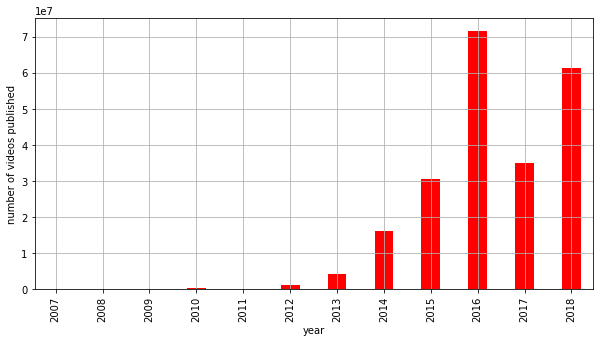

In [36]:
views_per_year = topic.groupby(['year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4
ax = fig.add_subplot(111) 

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

Een opmerkelijke piek in 2016. Daarna een vrij plotselinge afname en weer een flinke toename dit jaar. Wat zou dat kunnen verklaren? 

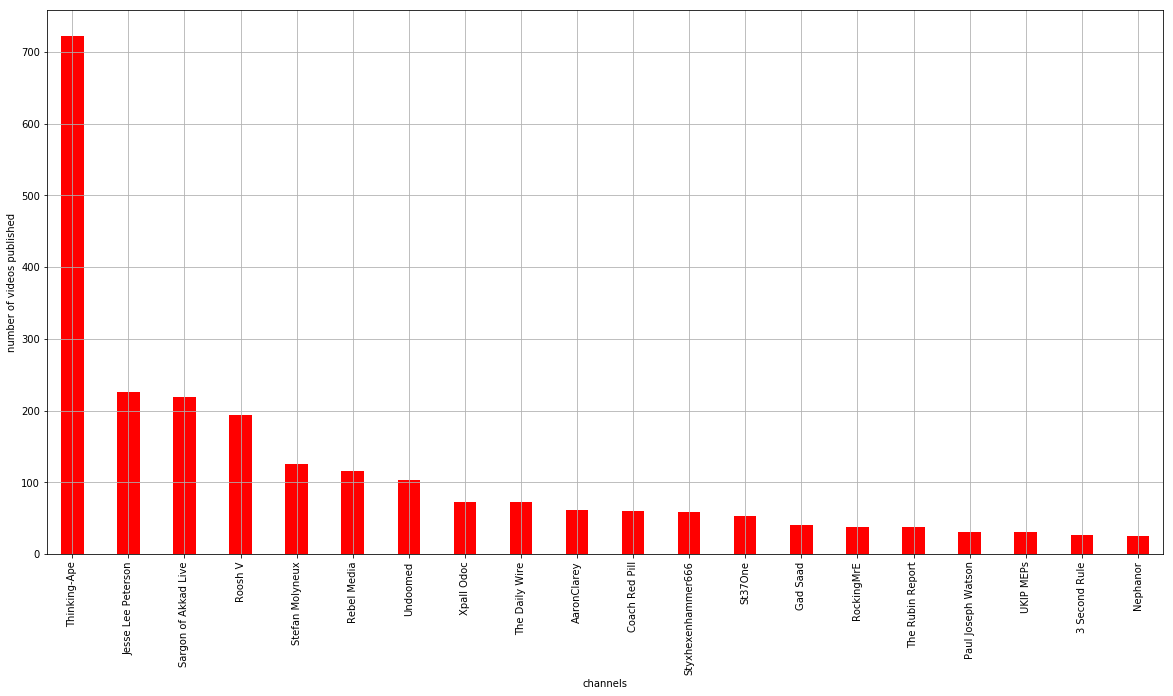

In [37]:
top_channels = topic['video_channel_title'].value_counts()[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

top_channels.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('channels')

plt.show()

Het lijkt me vrij duidelijk wie bovenop dit onderwerp zit: Thinking Ape. Hij publiceert al jaren zeer actief (722 videos). Laten we hem eens wat nader bekijken. Ik ben ook wel benieuwd naar Jessie Lee Peterson en eigenlijk kan ook Roosh V niet ontbreken. Sargon verdient volgens mij een eigen analyse, net als Stefan Molyneux. 

#### Manosphere - Thinking Ape

In [38]:
channel_of_interest = 'Thinking-Ape'

manosphere = topic[topic['video_channel_title'] == channel_of_interest]
len(manosphere)

722

Hoevaak zijn zijn video's bekeken?

In [39]:
manosphere.video_view_count.sum()

5965792.0

Wat is de verdeling van gemaakte video's over tijd? En de views over tijd?

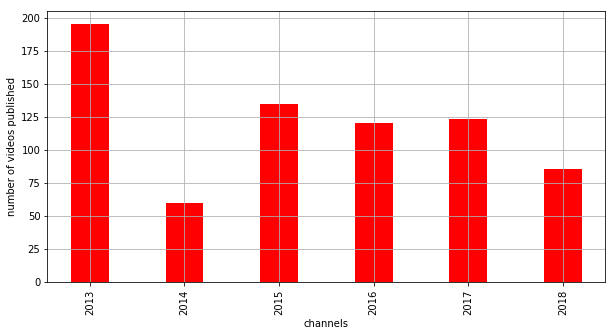

In [40]:
uploads = manosphere.groupby('year').size()
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

uploads.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('channels')

plt.show()

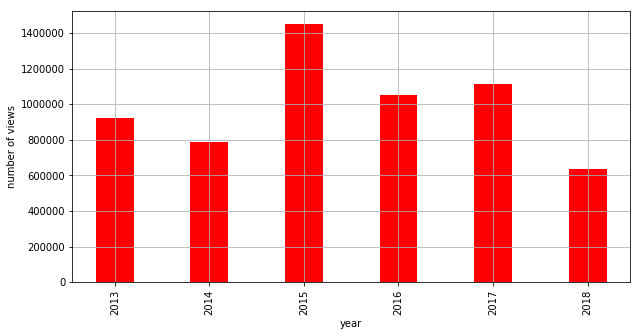

In [41]:
views = manosphere.groupby('year')['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

views.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Het duurde blijkbaar even voordat zijn video's werden opgemerkt. Hoogtepunt was in 2015. Interessant, aangezien veel kanalen rond 2016 of daarna pieken.

Laten we eens kijken naar de tags die hij gebruikt. 

In [42]:
vidtags = manosphere[['video_id', 'video_title', 'video_tags', 'year']]

video_tags = vidtags['video_tags'].str.replace(r"\[|\]|\'|-", '') \
                    .str.lower() \
                    .str.split(', ', expand=True) \
                    .merge(vidtags, right_index = True, left_index = True) \
                    .drop(["video_tags"], axis = 1) \
                    .melt(id_vars = ['video_id', 'video_title', 'year'], value_name = "tag") \
                    .drop(['variable'], axis=1) \
                    .dropna()

#video_tags = video_tags[~video_tags['tag'].str.contains('not set')]
#video_tags.sort_values('tag', inplace=True)
video_tags.tag.nunique()

video_tags['tag'] = video_tags['tag'].str.replace('"', '')
video_tags.tag.value_counts()

stardusk                                       720
feminism                                       705
hypergamy                                      697
briffaults law                                 688
gynocentrism                                   683
marriage                                       681
male disposability                             681
traditionalism                                 676
divorce                                        674
separation                                     665
alimony                                        650
women initiate divorce                         627
prostitutes                                    621
masculinity                                    619
legal prostitution                             614
femininity                                     614
women and children first                       591
child support                                  589
male expendability                             586
mangina                        

Even een verklarende woordenlijst:
    
1. Stardusk is [een YouTube-kanaal over MGTOW](https://youtube.com/user/Stardusk/videos). Het zou mij niets verbazen als dit ook van Thinking Ape is omdat hij zichzelf ook zo noemt.
2. Hypergamy is boven je strand trouwen, dus 'marrying up' of 'gold digging'. Zie [Wikipedia](https://en.wikipedia.org/wiki/Hypergamy).
3. Briffault's Law stelt, in hele simpele vorm, dat vrouwen eigenlijk de ultieme baas zijn (zie [dit artikel](https://www.psychologytoday.com/us/blog/machiavellians-gulling-the-rubes/201610/briffaults-law-women-rule) voor extra uitleg).
4. De naam zegt het eigenlijk al, bij gynocentrism draait alles om het gezichtspunt van de vrouw, zie [Wikipedia](https://en.wikipedia.org/wiki/Gynocentrism).
5. Male disposability, ook al zo'n deerniswekkend concept. Blijkbaar ook Male Expandability genoemd, zie [Wikipedia](https://en.wikipedia.org/wiki/Male_expendability).
6. Women initiate divorce slaat op de statistiek dat negentig procent van de echtscheidingen door vrouwen in gang wordt gezet. Zie bijvoorbeeld het [MGTOW-forum](https://www.mgtow.com/forums/topic/80-percent-of-divorces-are-initiated-filed-by-women/)

Meneer heeft trouwens 253 patrons [op patreon.](https://www.patreon.com/user?u=257125)

Al met al zijn die tags behoorlijk grof en vijandig. Opvallend dus ook: die tags is niet wat je in de normale interface van YT ziet. We zouden die tags ook nog over tijd kunnen plotten om iets van een ontwikkeling te zien. Ik weet niet of dat echt veel oplevert in dit geval, maar dan hebben we de code alvast om dat te doen.

In [43]:
tags_per_year = video_tags.groupby(['tag', 'year']).size().reset_index(name='counts')

# Geef een minimale hoeveelheid aan dat een tag voor moet komen, anders hebben we gewoon teveel.

minimum = 25

tags_per_year = tags_per_year[tags_per_year['counts'] >= minimum]

In [44]:
tags_per_year.sort_values('year', inplace=True)

In [45]:
# Schrijf 't naar een csv, zodat we het in gapminder kunnen zien.

tags_per_year.to_csv('output/scenario/tags_per_year_for_' + channel_of_interest + '_.csv', index=False)

TODO: nog even de file aanpassen omdat gapminder 'm niet goed laadt.

Laten we eens naar wat video's gaan kijken. Ik maak een vrij expliciete selectie, bijvoorbeeld op 'whores'.

In [46]:
lookup = video_tags[video_tags['tag'].str.contains('whores')]

In [47]:
lookup

,video_id,video_title,year,tag
3948,NreA_Sx6m7E,The Riddle Of The Pumpkin Spice Latte,2015,whores
4626,Qlr2eM8nP9w,"Perspectives: Spain, The Long Decline",2016,whores
5345,t8eTAsJVnNU,"MGTOW Talks: The Alt-Right, Population Genetic...",2016,whores
5374,bNhMyxU8NJI,Perspectives: Nigeria and the Reality of the 3...,2016,whores
5482,YRQTNHRmAKw,"Language/Dialect Distinction, the Politics of...",2015,whores
5808,OdmTF-a66wE,Anthony Bourdain | Reflections On Suicide And ...,2018,whores
6047,S6heBTvaekc,"Youth, Society And Neurological Reality",2016,whores
6078,9jXGfPNS8Og,Perspectives: Denmark and the Nordic Model,2016,whores
6091,xvn2HqDG1-U,"MGTOW Talks: Ethnicity, Civilisation and Culture",2016,whores
6111,8EGN2KfFusM,Invasive Species and Human Maladaptation,2015,whores


Neem [deze video](https://www.youtube.com/watch?v=8EGN2KfFusM). Invasive species and Human Maladaptation. We zien niet veel. Een kaart van een Australie, met de titel: 'current extent and anticipated distribution of cane toads in australia'. De video gaat over de verdringingen van soorten door menselijk toedoen. Wat heeft dat met de tag 'whores' te maken? Verder is de video niet erg schokkend. Pas later in de video (zo rond 16:00 gaat het over psychologische maladaptation, dat steden bijvoorbeeld verantwoordelijk zijn voor echtscheidingen). Hoe vrouwen zich in stedelijke gebieden gedragen en hoe in rurale gebieden. 

Of [deze video](https://www.youtube.com/watch?v=_XaJHKl8kAY): MGTOW Talks: SJWs And the Blue Pill Rebellion in Gaming. Een gesprek van 1:20 uur, met een vaste gast (Australier en womanizer). Begint met de vraag of SJW's professionele trollen zijn. 'You can't appease these people'. Over gamergate en de Sarkeesian crowd. Opmerkelijke vorm ook: we zien de hele tijd een aankondiging voor een software conferentie. Waarom is dat? 

[Dit](https://www.youtube.com/watch?v=t8eTAsJVnNU) is ook wel een interessant voorbeeld. Lang (bijna twee uur durend gesprek), het is me niet helemaal duidelijk waar 'ie staat. Lijkt zich juist af te zetten tegen alt-right.

Aparte comment, lieflijk haast, spreekt wel over redpilling [zie](https://www.youtube.com/watch?v=Kx-4s1gGOkA&lc=UgjKEwvAkB7XkXgCoAEC)

Wellicht is het interessant om te kijken naar de commenters. Waar zitten die nog meer? Is dit kanaal, vanuit het perspectief van de reaguurders, deel van een bredere gemeenschap?

Stap 1: even de video_id's in een lijst zetten.

In [48]:
manosphere_movies = set(manosphere.video_id)
len(manosphere_movies)

722

Stap 2: haal deze lijst door alle comments in het rechtse veld om de reaguurders te vinden.

In [49]:
iter_csv = pd.read_csv(path_right + 'comments_right.csv', 
                        chunksize=1000000, 
                        sep='¶',
                        quotechar='þ',
                        engine='python')
fappers = pd.concat([chunk[chunk['video_id'].isin(manosphere_movies)] for chunk in iter_csv])

len(fappers)

64403

64403 comments gevonden op de video's van Thinking Ape.

Stap 3. Zoek waar deze commenters nog meer hebben gereageerd, zodat we iets kunnen zeggen over de infosphere waar ze inzitten.

In [50]:
fappers_to_search = set(fappers.author_channel_id.unique())
len(fappers_to_search)

12912

In [51]:
iter_csv = pd.read_csv(path_right + 'comments_right.csv', 
                        chunksize=1000000, 
                        sep='¶',
                        quotechar='þ',
                        engine='python')
faposphere = pd.concat([chunk[chunk['author_channel_id'].isin(fappers_to_search)] for chunk in iter_csv])

len(faposphere)

1303433

Van deze groep hebben we dus 1,3 miljoen comments gevonden. Waar zitten ze dan?

In [52]:
fappers_united = pd.merge(faposphere, videos_right, on='video_id', how='left')

Waar zitten ze?

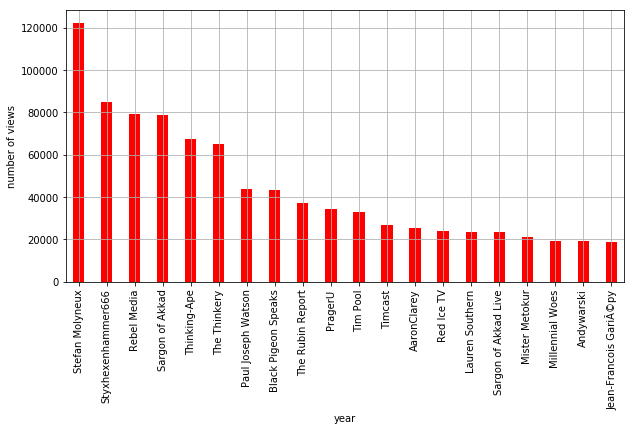

In [53]:
channels = fappers_united.video_channel_title.value_counts()[0:20]
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

channels.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Weinig verrassingen. Stefan Molyneux is wederom populair. Millennial Woes verbaasd me wel, evenals Jean Francois Gariepy. Zit dus lekker in de Alt-right.

Welke reaguurders vallen op?

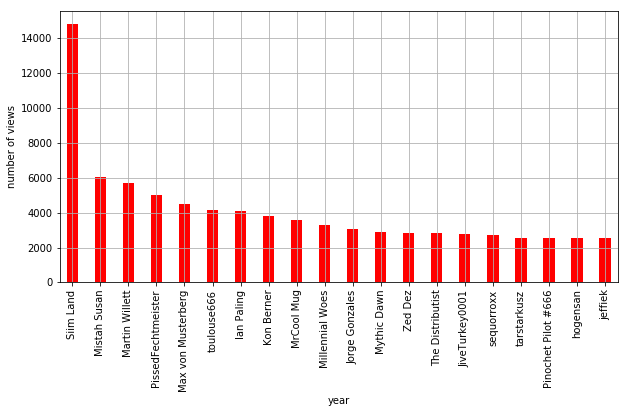

In [54]:
topfappers = fappers_united.author_display_name.value_counts()[0:20]
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

topfappers.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Kijk eens aan. Hier komen we een aantal bekenden tegen, waaronder Mr.CoolMug die ook bij Erkenbrand actief is.
Een aantal anderen zijn ook prominent in de NL scene. Kan zijn dat ze overal prominent zijn en dus ook in de NL scene, maar het zou zo maar kunnen dat dit Nederlanders zijn. 

Ik ga eens kijken naar de ultime topfapper, Siim Land en wat zijn pad is in de Alt-right scene.

In [55]:
siim = fappers_united[fappers_united['author_display_name'] == 'Siim Land']

Even checken of het echt 1 en dezelfde persoon is.

In [56]:
siim.author_channel_id.nunique()

1

Ja, er is maar een channel id. Die zijn uniek, dus we hebben hier met 1 persoon te maken, of beter gezegd, 1 account. Ik ga het even in [rawgraph](http://rawgraphs.io) bekijken. We hebben niet alle data nodig daarvoor, dus ik maak even een selectie.

In [57]:
siim_grouped = siim.groupby(['year', 'video_channel_title'])['video_channel_title'].agg('count')
siim_grouped

year  video_channel_title    
2016  Caleb Maddix                  1
      Siim Land                   270
      Thinking-Ape                  1
2017  Caleb Maddix                  4
      Impact Theory Studios         4
      Jordan B Peterson             2
      Jordan B Peterson Clips       1
      Siim Land                  6224
      Stefan Molyneux               1
      Thinking-Ape                  2
2018  Caleb Maddix                  1
      Gad Saad                      3
      Jordan B Peterson             1
      Siim Land                  8328
      Stefan Molyneux               1
      The Rubin Report              1
      Thinking-Ape                  3
Name: video_channel_title, dtype: int64

Aha. Hij heeft zijn eigen kanaal waar hij erg actief is. Dat is dus niet zo interessant. Laten we dan maar Mr.CoolMug nemen. 

In [58]:
mr_cool = fappers_united[fappers_united['author_display_name'] == 'MrCool Mug']
mr_cool.author_channel_id.nunique()

1

In [59]:
mr_cool_grouped = mr_cool.groupby(['year', 'video_channel_title'])['video_channel_title'].agg('count')
mr_cool_grouped.to_csv('output/scenario/raw_graph_mr_cool_mug.csv')
mr_cool_grouped

year  video_channel_title             
2007  Pat Condell                           1
2009  Survive the Jive                      1
2010  Pat Condell                           1
      Survive the Jive                      1
2011  Acts17Apologetics                     2
      Gavin McInnes                         2
      Pat Condell                           4
2012  American Renaissance                  2
      AnglosphereAlIiance                   1
      Libertarian Realist                   5
      Martin Willett                        1
      PJ Media                              1
      StevenCrowder                         1
      Survive the Jive                      1
2013  American Renaissance                  1
      Cosmic Claire                         1
      Libertarian Realist                   3
      NPI / Radix                           1
      Pat Condell                           2
      Red Ice TV                            1
      The Greatest Story Never Told TV   

Oke, MrCool Mug zit zo'n beetje overal. Wel een interessante casus hoor. Zie een niet al te beste weergave van zijn ontwikkeling [hier.](https://drive.google.com/open?id=1wCQS-o85-FknSLovHJVjYiovGxH7TVQX) 

Laten we dan toch nog even op zoek gaan naar een hardcore mgtow-er die onder veel mgtow-video's reageert. We zoomen dus weer even uit naar de gemeenschap als geheel.

In [60]:
len(topic)

2941

In [61]:
topic_videos = set(topic.video_id)

In [62]:
iter_csv = pd.read_csv(path_right + 'comments_right.csv', 
                        chunksize=1000000, 
                        sep='¶',
                        quotechar='þ',
                        engine='python')
fappers = pd.concat([chunk[chunk['video_id'].isin(topic_videos)] for chunk in iter_csv])

len(fappers)

945591

Dat zijn een boel fappers... You know the drill...

In [63]:
fappers_united = pd.merge(fappers, videos_right, on='video_id', how='left')

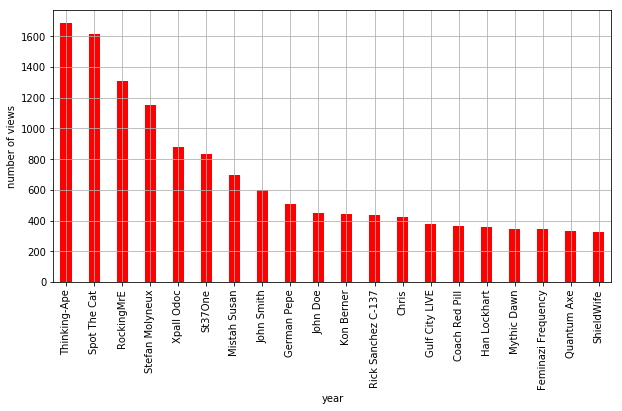

In [64]:
topfappers = fappers_united.author_display_name.value_counts()[0:20]
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

topfappers.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Ook hier zien we weer Mistah Susan hoog staan. Misschien is die wel interessant. Hoewel, feminazi frequency ook intrigeert.

In [65]:
mistah = fappers_united[fappers_united['author_display_name'] == 'Mistah Susan']
mistah.author_channel_id.nunique()

1

In [66]:
mistah_grouped = mistah.groupby(['year', 'video_channel_title'])['video_channel_title'].agg('count')
mistah_grouped.to_csv('output/scenario/raw_graph_mistah_susan.csv')
mistah_grouped

year  video_channel_title 
2014  The Rubin Report         12
      Thinking-Ape              7
2015  Paul Joseph Watson        3
      Sargon of Akkad Live     25
2016  Paul Joseph Watson       22
      Rebel Media               4
      Sargon of Akkad Live    139
      Stefan Molyneux           7
      Styxhexenhammer666        6
      The Rubin Report          1
      Thinking-Ape              3
2017  Aydin Paladin             2
      Rebel Media               2
      Sargon of Akkad Live    240
      Styxhexenhammer666       18
      The Distributist          1
      Thinking-Ape              8
2018  Aydin Paladin             4
      Sargon of Akkad           8
      Sargon of Akkad Live    139
      Styxhexenhammer666        6
      The Thinkery             19
      Thinking-Ape             13
      Tim Pool                  2
      Timcast                   3
Name: video_channel_title, dtype: int64

Hmmm. Ik ben niet vreselijk onder de indruk. Laten we nog even feminazi frequency proberen.

In [67]:
feminazi = fappers_united[fappers_united['author_display_name'] == 'Feminazi Frequency']
feminazi.author_channel_id.nunique()

1

In [68]:
feminazi_grouped = feminazi.groupby(['year', 'video_channel_title'])['video_channel_title'].agg('count')
feminazi_grouped.to_csv('output/scenario/raw_graph_feminazi.csv')
feminazi_grouped

year  video_channel_title 
2014  Sargon of Akkad           4
      Thinking-Ape              4
2015  Gad Saad                  1
      Paul Joseph Watson        1
      Sargon of Akkad Live    150
      The Rubin Report          2
      Thinking-Ape             30
2016  Gad Saad                  3
      Paul Joseph Watson        1
      Sargon of Akkad Live     78
      The Rubin Report          2
      Thinking-Ape              1
2017  Sargon of Akkad Live     58
      Thinking-Ape              1
2018  Mister Metokur            3
      Sargon of Akkad           1
      Sargon of Akkad Live      3
Name: video_channel_title, dtype: int64

Wederom, niet heel erg spannend. Ik heb de indruk dat Sargon de boel een beetje vertekend, omdat daar zo veel op gereageerd wordt. Wellicht moeten we hem en Stefan Molyneux er even uitfilteren.

In [69]:
fappers_clean = fappers_united[~fappers_united['video_channel_title'].str.contains('Sargon|Stefan|Styx|Prager')]
len(fappers_clean)

538296

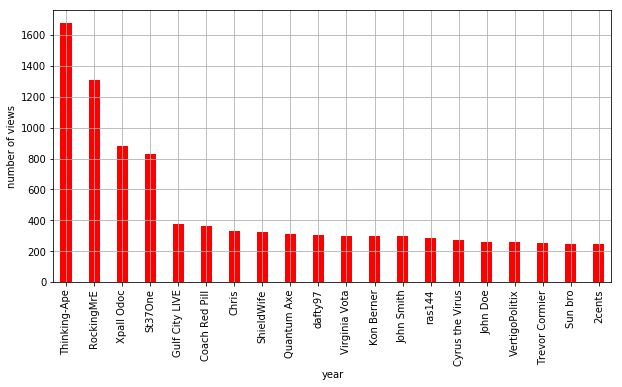

In [70]:
topfappers = fappers_clean.author_display_name.value_counts()[0:20]
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

topfappers.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Goed, laten we Xpall Odoc en St37One en Quantum Axe eens proberen.

In [71]:
quantum = fappers_clean[fappers_clean['author_display_name'] == 'Quantum Axe']
quantum.author_channel_id.nunique()

1

In [72]:
quantum_grouped = quantum.groupby(['year', 'video_channel_title'])['video_channel_title'].agg('count')
quantum_grouped

year  video_channel_title
2012  AaronClarey             1
2013  Thinking-Ape            2
2014  AaronClarey             3
      ShieldWife              4
      Thinking-Ape           76
2015  Gad Saad                1
      Thinking-Ape           93
      Xpall Odoc              1
2016  Thinking-Ape           43
2017  Thinking-Ape           35
2018  Gad Saad                5
      Thinking-Ape           46
Name: video_channel_title, dtype: int64

Nope, ik heb een aantal geprobeerd. Allemaal niet zo heel erg interessant.

Ik ben nog wel benieuwd naar een paar andere kanalen. Dus weer even inzoomen. Ik dacht zelf aan Jesse Lee Peterson en Roosh V. Ik begin met Jesse Lee Peterson, want die ken ik nog niet.

#### Manosphere - Jesse Lee Peterson

In [73]:
channel_of_interest = 'Jesse Lee Peterson'

manosphere = topic[topic['video_channel_title'] == channel_of_interest]
len(manosphere)

226

hoe vaak zijn zijn videos bekeken? 

In [74]:
manosphere.video_view_count.sum()

2898441.0

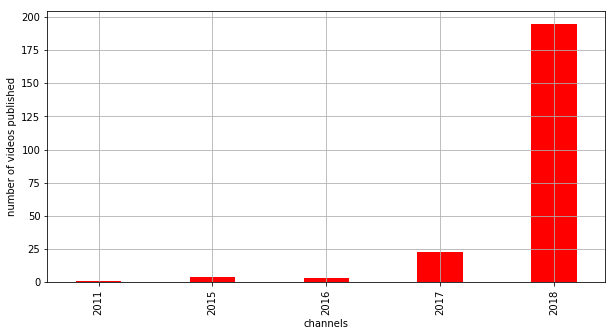

In [75]:
uploads = manosphere.groupby('year').size()
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

uploads.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('channels')

plt.show()

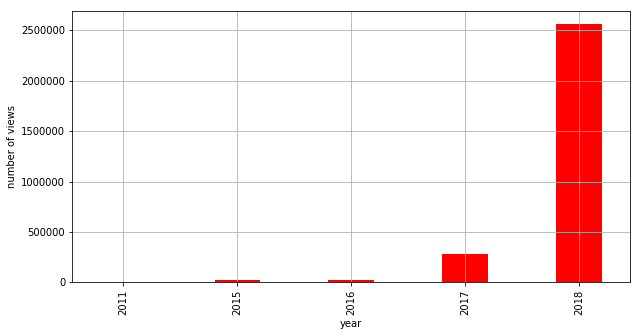

In [76]:
views = manosphere.groupby('year')['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

views.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Duidelijk up and coming. Zeker laatste jaar flinke groei.

Laten we ook hier eens naar de tags kijken

In [77]:
vidtags = manosphere[['video_id', 'video_title', 'video_tags', 'year']]

video_tags = vidtags['video_tags'].str.replace(r"\[|\]|\'|-", '') \
                    .str.lower() \
                    .str.split(', ', expand=True) \
                    .merge(vidtags, right_index = True, left_index = True) \
                    .drop(["video_tags"], axis = 1) \
                    .melt(id_vars = ['video_id', 'video_title', 'year'], value_name = "tag") \
                    .drop(['variable'], axis=1) \
                    .dropna()

#video_tags = video_tags[~video_tags['tag'].str.contains('not set')]
#video_tags.sort_values('tag', inplace=True)
video_tags.tag.nunique()

video_tags['tag'] = video_tags['tag'].str.replace('"', '')
video_tags.tag.value_counts()

jesse lee peterson      178
anger                   162
women                   156
masculinity             155
men                     153
donald trump            147
racism                  144
black people            139
marriage                135
fathers                 134
mothers                 133
children                130
children of the lie     128
forgiveness             126
biblical question       122
liberal                 121
silent prayer           121
the great white hope    120
barack obama            119
maga                    119
democrat                114
evil                    114
republican              114
meditation              111
amazing                 109
god                     109
lies                    107
satan                   101
jesus christ             98
son                      77
                       ... 
memorial day              1
equinox                   1
truck                     1
weekend                   1
daniel hubbard      

In [78]:
tags_per_year = video_tags.groupby(['tag', 'year']).size().reset_index(name='counts')

# Geef een minimale hoeveelheid aan dat een tag voor moet komen, anders hebben we gewoon teveel.

minimum = 25

tags_per_year = tags_per_year[tags_per_year['counts'] >= minimum]

In [79]:
tags_per_year.sort_values('year', inplace=True)

In [80]:
# Schrijf 't naar een csv, zodat we het in gapminder kunnen zien.

tags_per_year.to_csv('output/scenario/tags_per_year_for_' + channel_of_interest + '_.csv', index=False)

In [81]:
lookup = video_tags[video_tags['tag'].str.contains('masculinity')]

In [82]:
lookup

,video_id,video_title,year,tag
411,vt2UpMbaVg0,"Society Is Triggered by MEN, But Nobody Respec...",2018,masculinity
676,dTpMsj1Za2M,Should Men Be Sensitive?,2015,masculinity (quotation subject)
853,7285zzmRU6A,"R.A. the Rugged Man debates Jesse on whether ""...",2018,masculinity
1151,6H4OzmPxSxs,"""BETA MALE! NOT AN ALPHA MALE"" -- MOMMY'S BOY!...",2018,masculinity
1307,Wxe4WyvSuhM,What Is a Man? Are You a Man? Is Donald Trump ...,2018,masculinity
1316,HFepePZqiJQ,"Ann Coulter: The Crisis in Masculinity, Black ...",2018,masculinity
1349,dwOHXYkzZqg,College-Educated Man Calls Black Women âGodd...,2016,masculinity
1501,PkPUjZwaa7U,"What Is a Man? (Actor and ""Raging Liberal"" Jay...",2018,masculinity
1578,MXJxn9YBS6g,Tommy Sotomayor: A Fatherless America (Intervi...,2015,masculinity (quotation subject)
1765,6xQ3H38dkbw,"""The Rational Male"" Author Rollo Tomassi on Po...",2018,masculinity


Bevindingen: het is een wat minder vulgair kanaal dan Thinking Ape. 

De beste man klinkt alsof hij dronken is. 

[Video:](https://www.youtube.com/watch?v=cTuFEJD0ggM) why should you forgive 'sexual assault'. Gaat over Asia Argento zaak. God wil dat je voor vergiffenis vraagt en niet zo moeilijk doet. Ik denk niet dat dit kanaal heel interessant is om vanuit de manosphere verder uit te zoek. Vrouwonvriendelijk en antifeministisch? Zeker. Maar interessanter denk ik vanwege de huidskleur van de presentator en omdat 'ie meer in het christelijke uiterst rechtse kamp lijkt te zitten. Dan krijg je al snel het antifemisme erbij.

Laten we daarom nu naar Roosh V kijken.

#### Manosphere - Roosh V

In [83]:
channel_of_interest = 'Roosh V'

manosphere = topic[topic['video_channel_title'] == channel_of_interest]
len(manosphere)

194

Hoeveel views heeft hij gekregen (op dit onderwerp?)

In [84]:
manosphere.video_view_count.sum()

7646145.0

Toch nog ruim zeven miljoen.

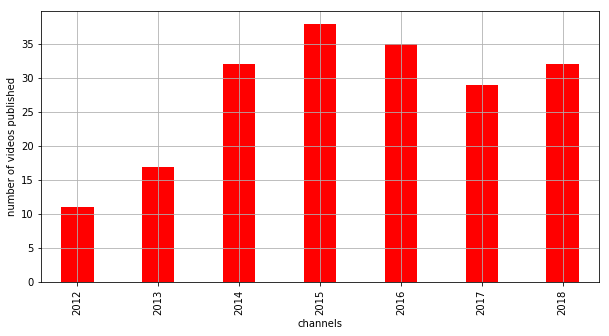

In [85]:
uploads = manosphere.groupby('year').size()
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

uploads.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('channels')

plt.show()

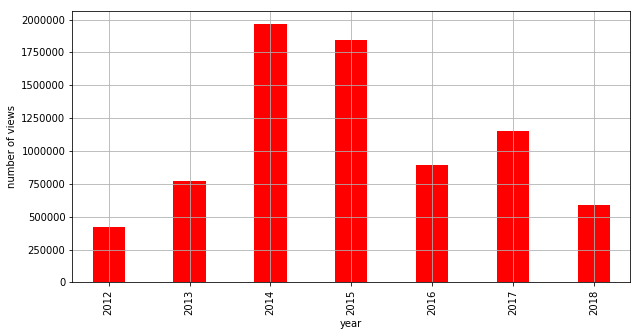

In [86]:
views = manosphere.groupby('year')['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

views.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Lijkt wel over zijn piek heen. 

In [87]:
vidtags = manosphere[['video_id', 'video_title', 'video_tags', 'year']]

video_tags = vidtags['video_tags'].str.replace(r"\[|\]|\'|-", '') \
                    .str.lower() \
                    .str.split(', ', expand=True) \
                    .merge(vidtags, right_index = True, left_index = True) \
                    .drop(["video_tags"], axis = 1) \
                    .melt(id_vars = ['video_id', 'video_title', 'year'], value_name = "tag") \
                    .drop(['variable'], axis=1) \
                    .dropna()

#video_tags = video_tags[~video_tags['tag'].str.contains('not set')]
#video_tags.sort_values('tag', inplace=True)
video_tags.tag.nunique()

video_tags['tag'] = video_tags['tag'].str.replace('"', '')
video_tags.tag.value_counts()

rooshv                           194
roosh                            194
roosh v                          194
daryush valizadeh                 92
daryush                           91
#hangoutsonair                    26
hangouts on air                   26
#hoa                              26
girls                             10
game                               8
montreal                           6
pickup                             6
ukraine                            6
pua                                6
toronto                            5
feminism                           5
women                              5
travel                             4
trump                              4
feminists                          4
canada                             4
sjw                                4
odessa                             4
ð¾ð´ðµñð°                         4
2017                               3
valizadeh                          3
poland                             3
t

Weinig interessants te vinden in zijn hashtags. Maar ik ben wel benieuwd naar zijn achterban.

In [88]:
manosphere_movies = set(manosphere.video_id)
len(manosphere_movies)

194

In [89]:
# TODO: hier gaat nog iets mis. Moet ik nog even naar kijken.

iter_csv = pd.read_csv(path_right + 'comments_right.csv', 
                        chunksize=1000000, 
                        sep='¶',
                        quotechar='þ',
                        engine='python')
fappers = pd.concat([chunk[chunk['video_id'].isin(manosphere_movies)] for chunk in iter_csv])

len(fappers)

0

### Geweld

Kunnen we een beeld krijgen van geweldsrethoriek?

### Antisemitisme

Ik hou de termen even beperkt. Als je bijvoorbeeld op Soros zoekt, krijg je erg veel terug dat mogelijk, maar niet per se antisemitisch hoeft te zijn. Daarom gebruik ik liever termen die minder dubbelzinnig zijn. Daarnaast lijkt het me verstandig om niet alleen in de tags te zoeken, maar ook in de beschrijvingen en comments. 

In [92]:
query_topic = 'antisemitism'

# Define the search terms that are likely to produce the best results. You can use regular expressions.

query = ['holohoax', '^jq', 'jewish question',
         'goy', 'schlom', 'shekel',
         'zog', 'zionis', 'zion wa'
        ]

In [93]:
pattern = '|'.join([s for s in query])
mask = videos_right['video_tags'].str.contains(pattern, regex=True, case=False, na=False)
topic = videos_right[mask]

len(topic)

1636

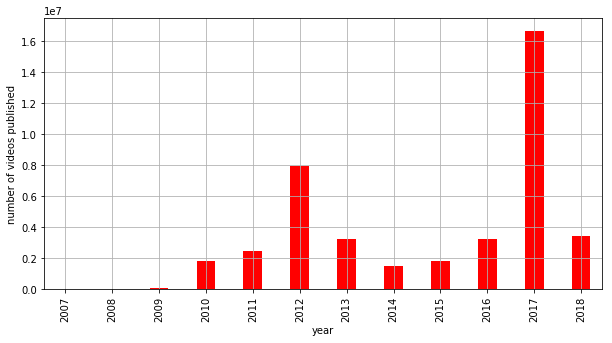

In [94]:
views_per_year = topic.groupby(['year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4
ax = fig.add_subplot(111) 

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

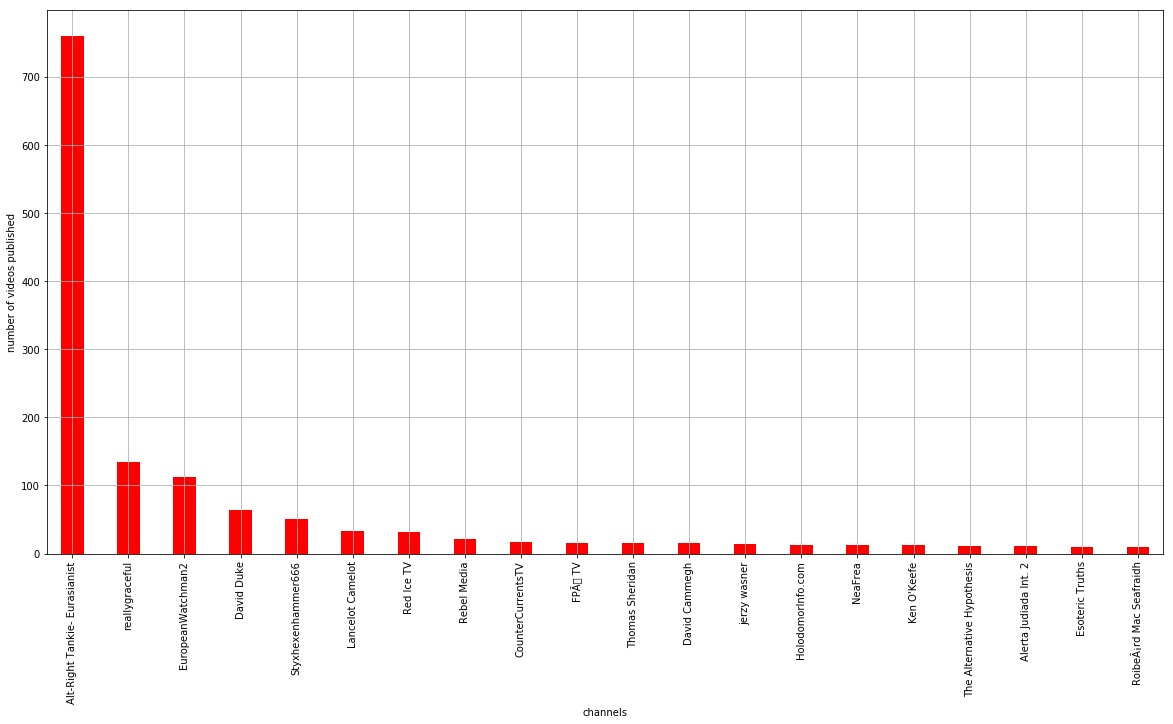

In [95]:
top_channels = topic['video_channel_title'].value_counts()[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

ax = fig.add_subplot(111) 

top_channels.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('channels')

plt.show()

Ik vermoed dat niet alle kanalen antisemitisch zijn. Ik zou eerder zeggen dat bijvoorbeeld Red Ice TV juist niet antisemitisch is, maar dat lijkt me iets om uit te zoeken. Sowieso is Alt-Right Tankie een erg interessant kanaal, ook omdat die populair is bij Erkenbrand. 

Dit zijn denk ik de stappen:
1. Eens kijken wat voor videos ik nu teruggekregen heb. Mogelijk moet ik de tags nog wat aanpassen.
2. De verschillende kanalen en hun achterban onderzoeken, in ieder geval de top3 en ik ben ook benieuwd naar FPO TV (misschien zit er iets in hun tags dat ze niet in het openbaar zeggen), Red Ice TV en Rebel Media.


In [96]:
topic

,video_id,video_published,channel_id,video_title,video_description,video_channel_title,video_tags,video_category_id,video_default_language,video_duration,video_view_count,video_comment_count,video_likes_count,video_dislikes_count,video_topic_ids,video_topic_categories,year,yearmonth
225,5cUhl20PtEw,2012-09-27T21:21:01.000Z,UCJIAT4v6irhZChsrB4hzsPA,Max Igan & Ken O'Keefe - Freestyle Gaza Rooftop,"Published on Sep 26, 2012 by aodscarecrow\n\nK...",Cosmic Claire,"['Max Igan', ""Ken O'Keefe"", 'Gaza', '911truth'...",27.0,not set,PT6M59S,23.0,0.0,1.0,0.0,not set,not set,2012,2012-09
1098,6t9u40jwXCU,2017-07-27T17:13:33.000Z,UCCsiAKRKcgzA_372WbXNBaw,Professor: Nationalism Has Triumphed Across Eu...,Nationalism has gone mainstream!!! PLEASE SUBS...,Dr. Steve Turley,"['Nationalism', 'European Nationalism', 'Natio...",22.0,not set,PT6M25S,944.0,13.0,32.0,2.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2017,2017-07
2433,95SmHaumMkw,2015-02-17T17:22:31.000Z,UCittVh8imKanO_5KohzDbpg,'Walking While Jew': What They're Not Telling You,What's the real agenda behind the rash of rece...,Paul Joseph Watson,"['walking in paris', 'walking in paris jew', '...",25.0,not set,PT4M46S,264467.0,1324.0,7625.0,590.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2015,2015-02
2500,cbHSiQyCPTw,2014-07-18T17:15:21.000Z,UCittVh8imKanO_5KohzDbpg,"""Israel is Only Defending Itself""","Is Israel really just defending itself, or is ...",Paul Joseph Watson,"['israel', 'gaza', 'intifada', 'palestinians',...",25.0,not set,PT11M54S,216817.0,6099.0,5938.0,3349.0,"['/m/098wr', '/m/05qt0', '/m/098wr', '/m/05qt0']","['https://en.wikipedia.org/wiki/Society', 'htt...",2014,2014-07
3633,pBRVorasrWM,2017-08-03T14:58:51.000Z,UCOwtpxZT8kXYfoj0W4XBrjw,Defiant Kevin Johnston speaks at Toronto Zioni...,"David Menzies reports, even though Peel Region...",Rebel Canada,"['Rebel', 'Media', 'Canada', 'Toronto', 'Jewis...",25.0,not set,PT7M44S,8902.0,231.0,577.0,23.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2017,2017-08
7895,N0tVoFJC3cM,2013-05-27T13:59:01.000Z,UCOzZn5enxZDEXonT6tBKBYA,ÃtvenezerÃ©rt lehet cionistÃ¡zni,NovÃ¡k ElÅdÅt 50.000 Ft-ra bÃ¼ntette KÃ¶vÃ©r...,nemzeti1tv,"['N1TV', 'Nemzeti1', 'Jobbik', 'Mszp', 'Fidesz...",25.0,not set,PT8M25S,8943.0,15.0,55.0,3.0,"['/m/098wr', '/m/05qt0', '/m/098wr', '/m/05qt0']","['https://en.wikipedia.org/wiki/Politics', 'ht...",2013,2013-05
9489,g-i-4xGCMkM,2018-04-03T22:41:17.000Z,UCaeO5vkdj5xOQHp4UmIN6dw,The Fight For Free Speech On Campus ft. Lt. Go...,The majority of college students oppose free s...,The Daily Wire,"['College', 'free speech', 'free speech zones'...",25.0,not set,PT42M42S,88304.0,41.0,362.0,75.0,"['/m/098wr', '/m/05qt0', '/m/098wr', '/m/05qt0']","['https://en.wikipedia.org/wiki/Politics', 'ht...",2018,2018-04
12807,IMjm4LxFa1c,2011-10-14T21:45:20.000Z,UC0uVZd8N7FfIZnPu0y7o95A,Anti-Semitic Protester at Occupy Wall Street - LA,Here's one of the protesters Reason.tv spoke t...,ReasonTV,"['Occupy Wall Street', 'OWS', 'Protest', 'big ...",25.0,not set,PT18S,296504.0,15838.0,1321.0,697.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2011,2011-10
12808,5sV-Io_gfL4,2011-10-14T21:30:09.000Z,UC0uVZd8N7FfIZnPu0y7o95A,Occupy LA: The Pro-Government Protesters?,Los Angeles became the first city to officiall...,ReasonTV,"['Occupy Wall Street', 'OWS', 'Protest', 'big ...",25.0,not set,PT4M55S,31283.0,211.0,233.0,38.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2011,2011-10
14486,4Hg2ygAteKA,2016-08-02T21:32:49.000Z,UCwsGg1UEGq6LE64ZtKRh3Ug,Premiere SCHWEINSKOPF AL DENTE MÃ¼nchen am 0...,Premiere SCHWEINSKOPF AL DENTE - \nMÃ¼nchen ...,jerzy wasner,"['Premiere SCHWEINSKOPF AL DENTE', 'SCHWEINSKO...",24.0,not set,PT10M58S,1081.0,0.0,2.0,2.0,"['/m/02jjt', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'],2016,2016-08
